In [1]:
%matplotlib inline

import os
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt

from mpl_toolkits.basemap import Basemap

import netCDF4 as nc

from six.moves import urllib # six is for Python 2/3 compatibility

from pycurrents.codas import to_day
from pycurrents.num import rangeslice
from pycurrents.num import eof
import seaborn as sns
# https://currents.soest.hawaii.edu/ocn_data_analysis/installation.html

In [2]:
ens1 = nc.Dataset('sst_ocean_1993_1995_anom_nino3_fldmean.nc')
ens2 = nc.Dataset('sst_ocean_2004_2006_anom_nino3_fldmean.nc')
ens3 = nc.Dataset('sst_ocean_2017_2019_anom_nino3_fldmean.nc')
ens4 = nc.Dataset('sst_ocean_2079_2081_anom_nino3_fldmean.nc')
ens5 = nc.Dataset('sst_ocean_2142_2144_anom_nino3_fldmean.nc')
ens6 = nc.Dataset('sst_ocean_2145_2147_anom_nino3_fldmean.nc')
ens7 = nc.Dataset('sst_ocean_2219_2221_anom_nino3_fldmean.nc')
ens8 = nc.Dataset('sst_ocean_2256_2258_anom_nino3_fldmean.nc')
ens9 = nc.Dataset('sst_ocean_2261_2263_anom_nino3_fldmean.nc')
ens10 = nc.Dataset('sst_ocean_2293_2295_anom_nino3_fldmean.nc')

sst1 = ens1.variables['sst'][0:36,0,0]
sst2 = ens2.variables['sst'][0:36,0,0]
sst3 = ens3.variables['sst'][0:36,0,0]
sst4 = ens4.variables['sst'][0:36,0,0]
sst5 = ens5.variables['sst'][0:36,0,0]
sst6 = ens6.variables['sst'][0:36,0,0]
sst7 = ens7.variables['sst'][0:36,0,0]
sst8 = ens8.variables['sst'][0:36,0,0]
sst9 = ens9.variables['sst'][0:36,0,0]
sst10 = ens10.variables['sst'][0:36,0,0]

ens1.close()
ens2.close()
ens3.close()
ens4.close()
ens5.close()
ens6.close()
ens7.close()
ens8.close()
ens9.close()
ens10.close()

In [7]:
def common_time_axis(dismr, verbose=True):
    """
    Generates common time axis for Nino3 and ISMR time series.
    """
    # generate the time axis
    Nt = len(dismr)
    time = [dt.datetime(1, 1, 15)]
    for i in range(1, len(dismr)):
        y = time[i - 1].year
        m = time[i - 1].month
        if m == 12:
            y += 1
            m = 0
        time.append(dt.datetime(y, m + 1, 15))
    time = np.array(time)

    return time
#time = common_time_axis(sst1)
time = np.arange(36)

In [8]:
sst1n = np.ma.filled(sst1.astype(float), np.nan)

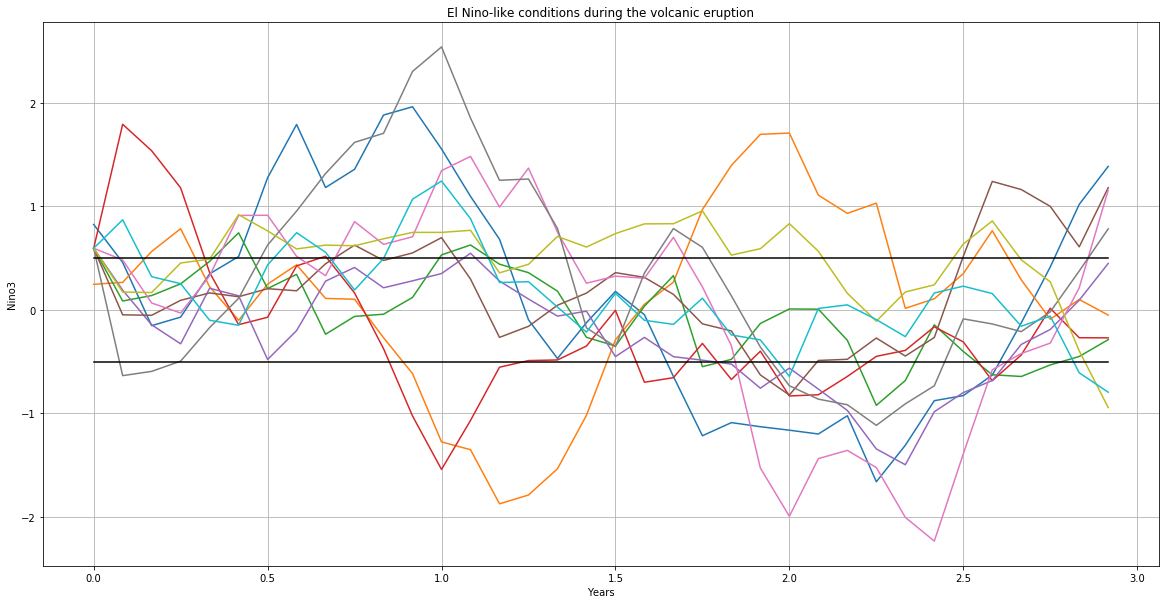

In [9]:
dummy = np.zeros(sst1.shape[0])
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(time/12, sst1)
plt.plot(time/12, sst2)
plt.plot(time/12, sst3)
plt.plot(time/12, sst4)
plt.plot(time/12, sst5)
plt.plot(time/12, sst6)
plt.plot(time/12, sst7)
plt.plot(time/12, sst8)
plt.plot(time/12, sst9)
plt.plot(time/12, sst10)
dummy[:] = 0.5
plt.plot(time/12, dummy,"black")
dummy[:]= -0.5
plt.plot(time/12, dummy,"black")


#lt.plot(0, dummy,"black")

plt.xlabel('Years')
plt.ylabel('Nino3')
plt.title('El Nino-like conditions during the volcanic eruption')
plt.savefig('warm_phase.png')

In [33]:
time.shape[0]

36